In [14]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scaling

In [15]:
# Define your scaling function
def custom_scaling(input_values):
    input_values_scaled = np.zeros_like(input_values, dtype=float)  # Initialize scaled data array
    input_values_scaled[:, 0] = (input_values[:, 0] - L_min) / (L_max - L_min)  # Scale L
    input_values_scaled[:, 1] = (input_values[:, 1] - C_min) / (C_max - C_min)  # Scale C
    input_values_scaled[:, 2] = (input_values[:, 2] - fsw_min) / (fsw_max - fsw_min)  # Scale fsw
    input_values_scaled[:, 3] = (input_values[:, 3] - t_dt_min) / (t_dt_max - t_dt_min) # Scale t_dt
    return input_values_scaled

# Define your scaling function
def custom_scaling_1(input_values):
    input_values_scaled = np.zeros_like(input_values, dtype=float)  # Initialize scaled data array
    input_values_scaled[:, 0] = (input_values[:, 0] - L_min) / (L_max - L_min)  # Scale L
    input_values_scaled[:, 1] = (input_values[:, 1] - C_min) / (C_max - C_min)  # Scale C
    input_values_scaled[:, 2] = (input_values[:, 2] - fsw_min) / (fsw_max - fsw_min)  # Scale fsw
    # input_values_scaled[:, 3] = (input_values[:, 3] - t_dt_min) / (t_dt_max - t_dt_min) # Scale t_dt
    return input_values_scaled

# 4 input 7 output

## Search N and H

In [16]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_13x13x13x13.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu", "P_D"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled = custom_scaling(X)
print(X_scaled[90:])

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses = {}
maes = {}
rmses = {}
r2_scores = {}
mapes = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256, 512, 1024]  # Number of neurons per hidden layer

[[0.         0.01020408 0.5        1.        ]
 [0.         0.01020408 0.58333333 0.        ]
 [0.         0.01020408 0.58333333 0.08272506]
 ...
 [1.         0.18367347 1.         0.83333333]
 [1.         0.18367347 1.         0.91727494]
 [1.         0.18367347 1.         1.        ]]


Epoch 1/100, Loss: 3.5317654609680176, Val Loss: 2.502565622329712
Epoch 2/100, Loss: 2.583296775817871, Val Loss: 2.349480152130127
Epoch 3/100, Loss: 2.518604278564453, Val Loss: 2.3102753162384033
Epoch 4/100, Loss: 2.4845378398895264, Val Loss: 2.2578463554382324
Epoch 5/100, Loss: 2.4111945629119873, Val Loss: 2.1500227451324463
Epoch 6/100, Loss: 2.3176510334014893, Val Loss: 2.0479040145874023
Epoch 7/100, Loss: 2.2097227573394775, Val Loss: 1.9309169054031372
Epoch 8/100, Loss: 2.083693742752075, Val Loss: 1.7481441497802734
Epoch 9/100, Loss: 1.9173325300216675, Val Loss: 1.5564388036727905
Epoch 10/100, Loss: 1.7914907932281494, Val Loss: 1.3669353723526
Epoch 11/100, Loss: 1.7093353271484375, Val Loss: 1.2688260078430176
Epoch 12/100, Loss: 1.6616015434265137, Val Loss: 1.2239853143692017
Epoch 13/100, Loss: 1.6152738332748413, Val Loss: 1.1910648345947266
Epoch 14/100, Loss: 1.6204640865325928, Val Loss: 1.1724470853805542
Epoch 15/100, Loss: 1.5929210186004639, Val Loss: 1

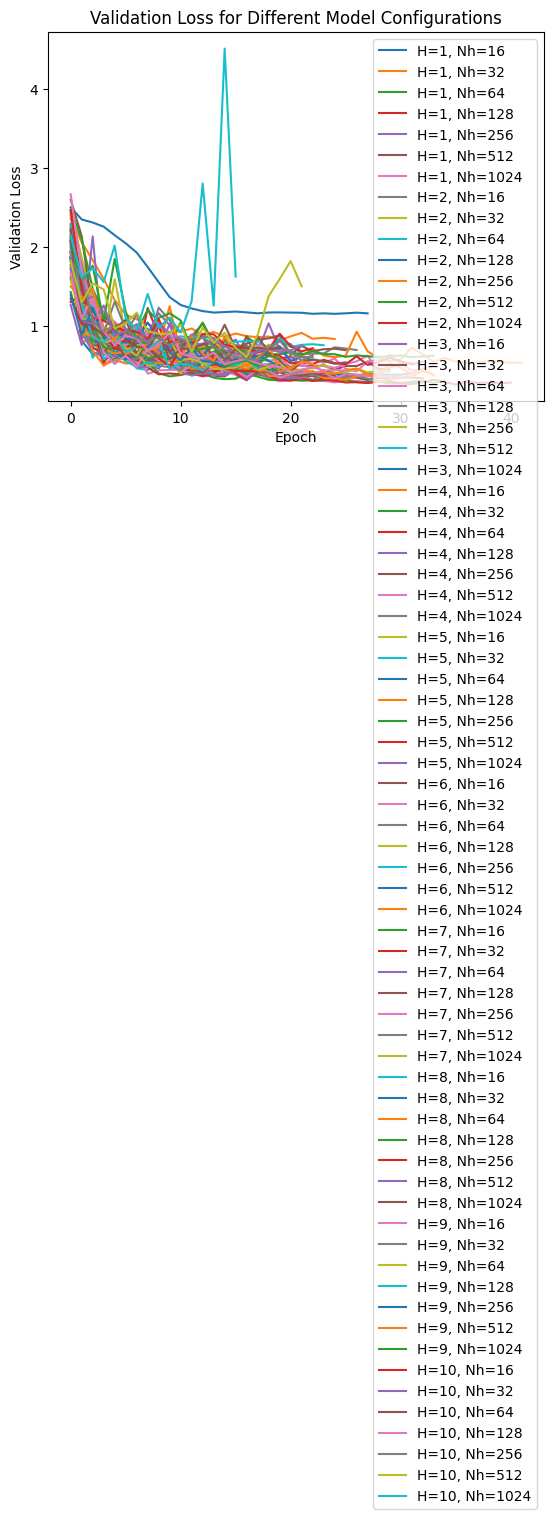

Model with H=1 and Nh=16:
MSE: 1.1284122467041016
MAE: 1.12841230868023
RMSE: 8.800048410301594
R-squared: 0.7382509282902632
MAPE: 23.75336373516341%
Model with H=1 and Nh=32:
MSE: 0.8029173016548157
MAE: 0.8029174627635023
RMSE: 6.2787979279132
R-squared: 0.8931193295549008
MAPE: 19.99345477761319%
Model with H=1 and Nh=64:
MSE: 0.6325855255126953
MAE: 0.6325855235741563
RMSE: 4.587969420488207
R-squared: 0.9270866218369026
MAPE: 15.55056249729527%
Model with H=1 and Nh=128:
MSE: 0.6483228206634521
MAE: 0.6483229198341677
RMSE: 5.854691242296156
R-squared: 0.9271719656491827
MAPE: 14.649226620258593%
Model with H=1 and Nh=256:
MSE: 0.5970555543899536
MAE: 0.5970554787861453
RMSE: 4.471903164093222
R-squared: 0.9364516064386488
MAPE: 15.352748505334224%
Model with H=1 and Nh=512:
MSE: 0.6198692321777344
MAE: 0.6198691564778233
RMSE: 4.185753213464377
R-squared: 0.8520011426415669
MAPE: 17.294797737880646%
Model with H=1 and Nh=1024:
MSE: 0.5942575335502625
MAE: 0.5942574038826729
RMSE

In [17]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model.add(tf.keras.layers.Dense(7, activation='softplus'))  

        # Compile the model
        model.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories[(H, Nh)] = history

        # Evaluate the model on the testing set
        predictions = model.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse = model.evaluate(X_test, y_test)
        mses[(H, Nh)] = mse

        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, predictions)
        maes[(H, Nh)] = mae

        # Calculate Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmses[(H, Nh)] = rmse

        # Calculate R-squared (R2) Score
        r2 = r2_score(y_test, predictions)
        r2_scores[(H, Nh)] = r2

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
        mapes[(H, Nh)] = mape

# Plot the validation loss for each configuration
for (H, Nh), history in histories.items():
    plt.plot(history.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse in mses.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse}')
    print(f'MAE: {maes[(H, Nh)]}')
    print(f'RMSE: {rmses[(H, Nh)]}')
    print(f'R-squared: {r2_scores[(H, Nh)]}')
    print(f'MAPE: {mapes[(H, Nh)]}%')


### Ranking

In [18]:
# Rank combinations based on their MSE values
ranked_combinations = sorted(mses.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse) in enumerate(ranked_combinations, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse}")


Rank 1: Combination H=5, Nh=256 - MSE: 0.2685861587524414
Rank 2: Combination H=5, Nh=512 - MSE: 0.26927897334098816
Rank 3: Combination H=4, Nh=1024 - MSE: 0.2832221984863281
Rank 4: Combination H=4, Nh=512 - MSE: 0.29064759612083435
Rank 5: Combination H=6, Nh=1024 - MSE: 0.3075002133846283
Rank 6: Combination H=7, Nh=256 - MSE: 0.32315966486930847
Rank 7: Combination H=3, Nh=256 - MSE: 0.3244527578353882
Rank 8: Combination H=4, Nh=128 - MSE: 0.32607361674308777
Rank 9: Combination H=4, Nh=256 - MSE: 0.3269226551055908
Rank 10: Combination H=5, Nh=1024 - MSE: 0.33056139945983887
Rank 11: Combination H=4, Nh=64 - MSE: 0.3360600769519806
Rank 12: Combination H=3, Nh=512 - MSE: 0.3548477292060852
Rank 13: Combination H=7, Nh=128 - MSE: 0.36053985357284546
Rank 14: Combination H=6, Nh=64 - MSE: 0.36217623949050903
Rank 15: Combination H=3, Nh=1024 - MSE: 0.3668963313102722
Rank 16: Combination H=5, Nh=64 - MSE: 0.3715854287147522
Rank 17: Combination H=9, Nh=512 - MSE: 0.376729935407638

In [23]:
# Specify the combination you want to call
H = 5
Nh = 256

# Retrieve the model for the specified combination
selected_model = histories[(H, Nh)].model
selected_model.save("model_5_256_13_13_13_13.h5")
# Use the trained model to make predictions on the testing set
predictions = selected_model.predict(X_test)

# Evaluate the model on the testing set
mse = selected_model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Print the first few predictions
print("Predictions:")
print(predictions[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

d:\Krishna\Python_3_92\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


134/134 [==============================] - 0s 1ms/step - loss: 0.2686
Mean Squared Error on Testing Set: 0.2685861587524414
Predictions:
[[4.79398537e+00 5.38810372e-01 1.72072649e+00 1.71121716e+00
  2.19367705e-02 8.77635300e-01 1.14187755e-01]
 [1.51538115e+01 5.59804249e+00 1.38804817e+00 1.37676358e+00
  1.50550902e-03 2.08017781e-01 1.22065715e-01]
 [1.66324158e+01 2.59927750e+00 1.93050838e+00 1.89989507e+00
  1.30938236e-02 5.47767282e-01 1.06257014e-01]
 [4.33450127e+00 1.14009428e+00 2.11334467e+00 2.11292672e+00
  9.30955727e-03 9.32900548e-01 1.15175501e-01]
 [2.02471485e+01 5.53248644e+00 1.92441416e+00 1.94266689e+00
  2.58048400e-02 1.25888240e+00 4.04483899e-02]]
True Values:
[[4.76080528e+00 5.25655146e-01 1.67239255e+00 1.67239255e+00
  1.99805977e-02 9.73727435e-01 1.21483470e-01]
 [2.13022187e+01 4.20957287e+00 1.32108197e+00 1.32108197e+00
  9.90812382e-04 1.72777606e-01 1.30921004e-01]
 [1.65742053e+01 2.70162061e+00 1.91680832e+00 1.91680832e+00
  9.07691085e-03 

# Different dataset (15^4)

In [19]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_15_15_15_15.csv")

# Extract input features (L, C, fsw)
X_1 = df[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_1 = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu", "P_D"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_1 = custom_scaling(X)
print(X_scaled_1[90:])

# Split the dataset into training, validation, and testing sets
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X_scaled_1, y_1, test_size=0.3, random_state=42)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_1 = {}
maes_1 = {}
rmses_1 = {}
r2_scores_1 = {}
mapes_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256, 512, 1024]  # Number of neurons per hidden layer

[[0.         0.01020408 0.5        1.        ]
 [0.         0.01020408 0.58333333 0.        ]
 [0.         0.01020408 0.58333333 0.08272506]
 ...
 [1.         0.18367347 1.         0.83333333]
 [1.         0.18367347 1.         0.91727494]
 [1.         0.18367347 1.         1.        ]]


Epoch 1/100, Loss: 3.489712953567505, Val Loss: 2.4688029289245605
Epoch 2/100, Loss: 2.5453057289123535, Val Loss: 2.3338730335235596
Epoch 3/100, Loss: 2.4760422706604004, Val Loss: 2.2302775382995605
Epoch 4/100, Loss: 2.396348476409912, Val Loss: 2.1415443420410156
Epoch 5/100, Loss: 2.296962261199951, Val Loss: 2.0141026973724365
Epoch 6/100, Loss: 2.200871229171753, Val Loss: 1.9088417291641235
Epoch 7/100, Loss: 2.0895140171051025, Val Loss: 1.7747337818145752
Epoch 8/100, Loss: 1.9184011220932007, Val Loss: 1.5362523794174194
Epoch 9/100, Loss: 1.7857029438018799, Val Loss: 1.4425824880599976
Epoch 10/100, Loss: 1.7194182872772217, Val Loss: 1.2804067134857178
Epoch 11/100, Loss: 1.6672863960266113, Val Loss: 1.2435415983200073
Epoch 12/100, Loss: 1.641161561012268, Val Loss: 1.1990922689437866
Epoch 13/100, Loss: 1.6094070672988892, Val Loss: 1.1786489486694336
Epoch 14/100, Loss: 1.6219031810760498, Val Loss: 1.1709362268447876
Epoch 15/100, Loss: 1.598440408706665, Val Loss:

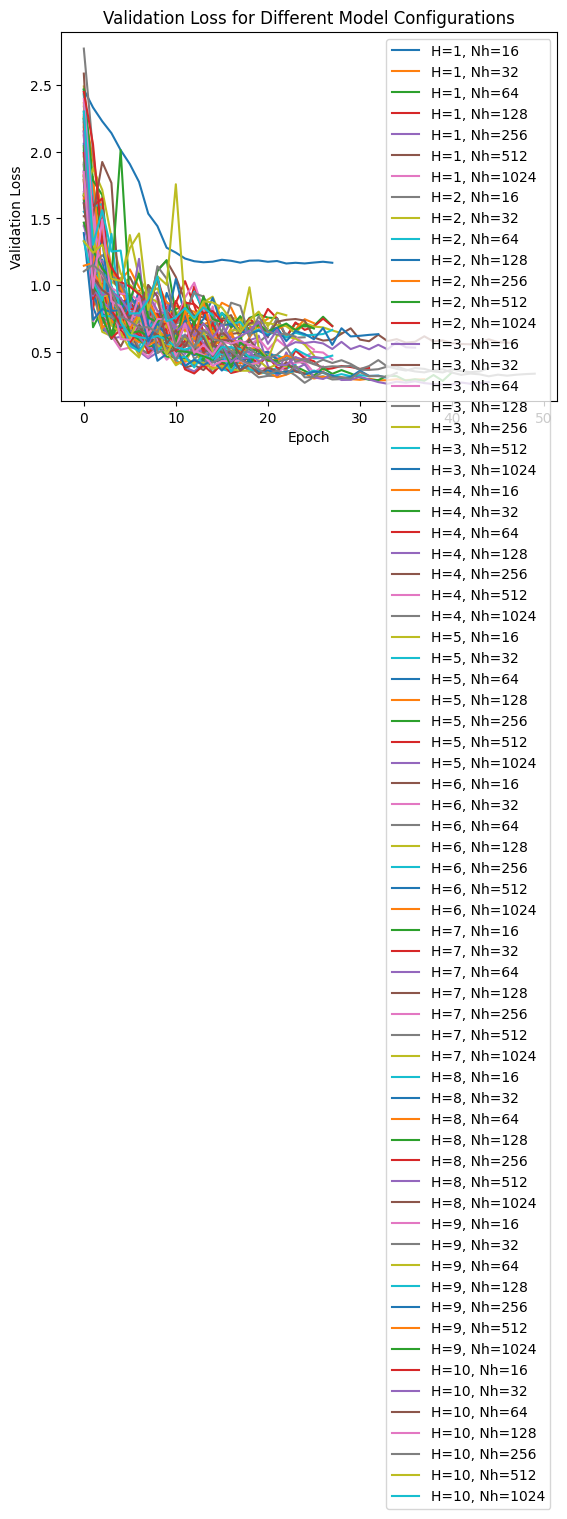

Model with H=1 and Nh=16:
MSE: 1.129625916481018
MAE: 1.1296260713441355
RMSE: 8.72690705641313
R-squared: 0.782463310002356
MAPE: 22.74456081704144%
Model with H=1 and Nh=32:
MSE: 0.660459041595459
MAE: 0.6604589372991134
RMSE: 4.574242285470764
R-squared: 0.9196487401281657
MAPE: 17.70103199186651%
Model with H=1 and Nh=64:
MSE: 0.6047598123550415
MAE: 0.6047598646586049
RMSE: 3.3846411799425717
R-squared: 0.9438107530938933
MAPE: 15.468880059835419%
Model with H=1 and Nh=128:
MSE: 0.6141096949577332
MAE: 0.6141097500759054
RMSE: 3.5234548280905846
R-squared: 0.949346091791156
MAPE: 14.636942915656142%
Model with H=1 and Nh=256:
MSE: 0.6311825513839722
MAE: 0.631182405439013
RMSE: 5.076998648618347
R-squared: 0.8999547807017312
MAPE: 14.419749211368341%
Model with H=1 and Nh=512:
MSE: 0.6110354065895081
MAE: 0.6110352557492126
RMSE: 4.020543093012793
R-squared: 0.9023751805939738
MAPE: 16.01491985533979%
Model with H=1 and Nh=1024:
MSE: 0.5774250030517578
MAE: 0.5774250305509486
RMSE

In [20]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_1.add(tf.keras.layers.Dense(7, activation='softplus'))  

        # Compile the model
        model_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val_1, y_val_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_1[(H, Nh)] = history_1

        # Evaluate the model on the testing set
        predictions_1 = model_1.predict(X_test_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_1 = model_1.evaluate(X_test_1, y_test_1)
        mses_1[(H, Nh)] = mse_1

        # Calculate Mean Absolute Error (MAE)
        mae_1 = mean_absolute_error(y_test_1, predictions_1)
        maes_1[(H, Nh)] = mae_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_1 = np.sqrt(mean_squared_error(y_test_1, predictions_1))
        rmses_1[(H, Nh)] = rmse_1

        # Calculate R-squared (R2) Score
        r2_1 = r2_score(y_test_1, predictions_1)
        r2_scores_1[(H, Nh)] = r2_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_1 = np.mean(np.abs((y_test_1 - predictions_1) / y_test_1)) * 100
        mapes_1[(H, Nh)] = mape_1

# Plot the validation loss for each configuration
for (H, Nh), history_1 in histories_1.items():
    plt.plot(history_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_1 in mses_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_1}')
    print(f'MAE: {maes_1[(H, Nh)]}')
    print(f'RMSE: {rmses_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_1[(H, Nh)]}')
    print(f'MAPE: {mapes_1[(H, Nh)]}%')


In [21]:
# Rank combinations based on their MSE values
ranked_combinations_1 = sorted(mses_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_1) in enumerate(ranked_combinations_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_1}")


Rank 1: Combination H=5, Nh=1024 - MSE: 0.24989311397075653
Rank 2: Combination H=4, Nh=1024 - MSE: 0.25332745909690857
Rank 3: Combination H=5, Nh=256 - MSE: 0.26306357979774475
Rank 4: Combination H=5, Nh=128 - MSE: 0.2938171923160553
Rank 5: Combination H=7, Nh=512 - MSE: 0.3085176348686218
Rank 6: Combination H=6, Nh=512 - MSE: 0.31167203187942505
Rank 7: Combination H=6, Nh=256 - MSE: 0.3126179277896881
Rank 8: Combination H=4, Nh=512 - MSE: 0.31844809651374817
Rank 9: Combination H=10, Nh=256 - MSE: 0.32568618655204773
Rank 10: Combination H=6, Nh=64 - MSE: 0.3365779221057892
Rank 11: Combination H=5, Nh=512 - MSE: 0.3376925587654114
Rank 12: Combination H=3, Nh=512 - MSE: 0.33899661898612976
Rank 13: Combination H=4, Nh=128 - MSE: 0.3397841155529022
Rank 14: Combination H=7, Nh=128 - MSE: 0.3400576710700989
Rank 15: Combination H=6, Nh=128 - MSE: 0.34858980774879456
Rank 16: Combination H=4, Nh=256 - MSE: 0.364061176776886
Rank 17: Combination H=4, Nh=64 - MSE: 0.369510740041732

### Try spesific N and H

In [22]:
# Specify the combination you want to call
H = 5
Nh = 1024

# Retrieve the model for the specified combination
selected_model_1 = histories_1[(H, Nh)].model
selected_model_1.save("model_5_1024_15_15_15_15.h5")
# Use the trained model to make predictions on the testing set
predictions_1 = selected_model_1.predict(X_test_1)

# Evaluate the model on the testing set
mse_1 = selected_model_1.evaluate(X_test_1, y_test_1)
print("Mean Squared Error on Testing Set:", mse_1)

# Print the first few predictions
print("Predictions:")
print(predictions_1[:5])

# Print the corresponding true values
print("True Values:")
print(y_test_1[:5])

d:\Krishna\Python_3_92\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


134/134 [==============================] - 0s 3ms/step - loss: 0.2499
Mean Squared Error on Testing Set: 0.24989311397075653
Predictions:
[[4.3977466e+00 4.6434447e-01 1.7487903e+00 1.7401148e+00 2.4564873e-02
  9.7927451e-01 1.2027615e-01]
 [1.8035984e+01 5.2553568e+00 1.3065366e+00 1.3035849e+00 1.6488011e-03
  1.9935820e-01 1.3207436e-01]
 [1.6973906e+01 2.4805527e+00 1.9173111e+00 1.9158671e+00 1.2477843e-02
  4.9686888e-01 1.2632068e-01]
 [4.1378069e+00 1.0608995e+00 2.0673270e+00 2.0661361e+00 8.7880660e-03
  9.2924935e-01 1.2281534e-01]
 [1.9489346e+01 6.5418119e+00 1.9629730e+00 1.9656271e+00 2.4244696e-02
  1.1453820e+00 3.8663704e-02]]
True Values:
[[4.76080528e+00 5.25655146e-01 1.67239255e+00 1.67239255e+00
  1.99805977e-02 9.73727435e-01 1.21483470e-01]
 [2.13022187e+01 4.20957287e+00 1.32108197e+00 1.32108197e+00
  9.90812382e-04 1.72777606e-01 1.30921004e-01]
 [1.65742053e+01 2.70162061e+00 1.91680832e+00 1.91680832e+00
  9.07691085e-03 4.61170538e-01 1.27955992e-01]
 [4

# Machine Learning

Epoch 1/100, Loss: 2.2866857051849365, Val Loss: 2.571958541870117
Epoch 2/100, Loss: 1.9187602996826172, Val Loss: 3.4091126918792725
Epoch 3/100, Loss: 1.7702720165252686, Val Loss: 1.2799644470214844
Epoch 4/100, Loss: 1.6664124727249146, Val Loss: 1.0638561248779297
Epoch 5/100, Loss: 1.7233836650848389, Val Loss: 1.4774147272109985
Epoch 6/100, Loss: 1.6873492002487183, Val Loss: 2.0373520851135254
Epoch 7/100, Loss: 1.6562879085540771, Val Loss: 1.2898961305618286
Epoch 8/100, Loss: 1.5521819591522217, Val Loss: 1.081950306892395
Epoch 9/100, Loss: 1.5038197040557861, Val Loss: 0.8322009444236755
Epoch 10/100, Loss: 1.4938000440597534, Val Loss: 1.2523847818374634
Epoch 11/100, Loss: 1.458170771598816, Val Loss: 1.1327825784683228
Epoch 12/100, Loss: 1.489689826965332, Val Loss: 1.087729811668396
Epoch 13/100, Loss: 1.4055639505386353, Val Loss: 0.6505082249641418
Epoch 14/100, Loss: 1.4112576246261597, Val Loss: 0.7315927743911743
Epoch 15/100, Loss: 1.4098701477050781, Val Loss

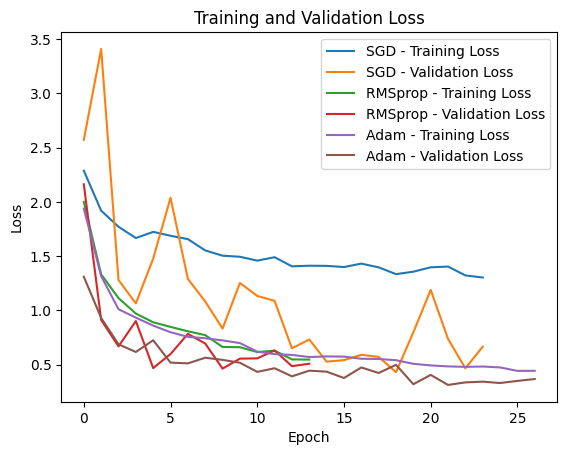

In [40]:
# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_13x13x13x13.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu", "P_D"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

# Apply custom scaling
X_scaled = custom_scaling(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Assuming you have already defined your machine learning model and dataset
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Import the required optimizers
from tensorflow.keras.optimizers import SGD, RMSprop

# Define the models with different optimizers
model_sgd = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(4,)),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7, activation='softplus')                               
])

model_rmsprop = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(4,)),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7, activation='softplus')                               
])

model_adam = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(4,)),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7, activation='softplus')                               
])

# Compile the models with different optimizers
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_sgd.compile(optimizer=sgd_optimizer, loss='mean_absolute_error')

rmsprop_optimizer = RMSprop(learning_rate=0.001)
model_rmsprop.compile(optimizer=rmsprop_optimizer, loss='mean_absolute_error')


model_adam.compile(optimizer='adam', loss='mean_absolute_error')

# Train the models with given hyperparameters
history_sgd = model_sgd.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)

history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)


history_adam = model_adam.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
# Plot training and validation loss for all models
plt.plot(history_sgd.history['loss'], label='SGD - Training Loss')
plt.plot(history_sgd.history['val_loss'], label='SGD - Validation Loss')
plt.plot(history_rmsprop.history['loss'], label='RMSprop - Training Loss')
plt.plot(history_rmsprop.history['val_loss'], label='RMSprop - Validation Loss')
plt.plot(history_adam.history['loss'], label='Adam - Training Loss')
plt.plot(history_adam.history['val_loss'], label='Adam - Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Import the required module for weight initialization
# from tensorflow.keras.initializers import GlorotUniform, HeNormal, RandomNormal

# # Initialize different weight initializers
# glorot_uniform_initializer = GlorotUniform()  # Glorot (Xavier) Uniform initializer
# he_normal_initializer = HeNormal()            # He Normal initializer
# random_normal_initializer = RandomNormal(mean=0.0, stddev=0.05)  # Random Normal initializer

# # Define your model with different initialization techniques
# model_glorot_uniform = tf.keras.Sequential([
#     tf.keras.layers.Dense(512, activation='relu', kernel_initializer=glorot_uniform_initializer, input_shape=(4,)),  
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(512, activation='relu', kernel_initializer=glorot_uniform_initializer), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(512, activation='relu', kernel_initializer=glorot_uniform_initializer), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(7, activation='softplus', kernel_initializer=glorot_uniform_initializer)                               
# ])

# model_he_normal = tf.keras.Sequential([
#     tf.keras.layers.Dense(512, activation='relu', kernel_initializer=he_normal_initializer, input_shape=(4,)),  
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(512, activation='relu', kernel_initializer=he_normal_initializer), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(512, activation='relu', kernel_initializer=he_normal_initializer), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(7, activation='softplus', kernel_initializer=he_normal_initializer)                               
# ])

# model_random_normal = tf.keras.Sequential([
#     tf.keras.layers.Dense(512, activation='relu', kernel_initializer=random_normal_initializer, input_shape=(4,)),  
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(512, activation='relu', kernel_initializer=random_normal_initializer), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(512, activation='relu', kernel_initializer=random_normal_initializer), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(7, activation='softplus', kernel_initializer=random_normal_initializer)                               
# ])

# # Compile the models
# model_glorot_uniform.compile(optimizer='adam', loss='mean_absolute_error')
# model_he_normal.compile(optimizer='adam', loss='mean_absolute_error')
# model_random_normal.compile(optimizer='adam', loss='mean_absolute_error')

# # Train the models with given hyperparameters
# history_glorot_uniform = model_glorot_uniform.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
#                         callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)

# history_he_normal = model_he_normal.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
#                         callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)

# history_random_normal = model_random_normal.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
#                         callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)

# # Define your model with default weight initialization
# model_default = tf.keras.Sequential([
#     tf.keras.layers.Dense(512, activation='relu', input_shape=(4,)),  
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(512, activation='relu'), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(512, activation='relu'), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(7, activation='softplus')                               
# ])

# # Compile the default model
# model_default.compile(optimizer='adam', loss='mean_absolute_error')

# # Train the default model with given hyperparameters
# history_default = model_default.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
#                         callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)

# # Plot training and validation loss for all models
# plt.plot(history_glorot_uniform.history['loss'], label='Glorot Uniform - Training Loss')
# plt.plot(history_glorot_uniform.history['val_loss'], label='Glorot Uniform - Validation Loss')
# plt.plot(history_he_normal.history['loss'], label='He Normal - Training Loss')
# plt.plot(history_he_normal.history['val_loss'], label='He Normal - Validation Loss')
# plt.plot(history_random_normal.history['loss'], label='Random Normal - Training Loss')
# plt.plot(history_random_normal.history['val_loss'], label='Random Normal - Validation Loss')
# plt.plot(history_default.history['loss'], label='Default Initialization - Training Loss')
# plt.plot(history_default.history['val_loss'], label='Default Initialization - Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(512, activation='relu', input_shape=(4,)),  # Scalarization layer         # Hidden layer 1
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(512, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),         
#     tf.keras.layers.Dense(7, activation='softplus')                               # Output layer with 6 neurons
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_absolute_error')

#     # Train the model with given hyperparameters
# history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), 
#                         callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Function to print evaluation metrics
def print_evaluation_metrics(model_name, y_true, y_pred):
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    print(f'{model_name} - Mean Absolute Error (MAE): {mae}')

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{model_name} - Root Mean Squared Error (RMSE): {rmse}')

    # Calculate R-squared (R2) Score
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - R-squared (R2) Score: {r2}')

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f'{model_name} - Mean Absolute Percentage Error (MAPE): {mape}%')

y_preds_sgd = model_sgd.predict(X_test)
print_evaluation_metrics("SGD: ", y_test, y_preds_sgd)

y_preds_rms = model_rmsprop.predict(X_test)
print_evaluation_metrics("RMS: ", y_test, y_preds_rms)

y_preds_adam = model_adam.predict(X_test)
print_evaluation_metrics("Adam: ", y_test, y_preds_adam)
# # Evaluate and print metrics for models with different initializations
# y_preds_glorot = model_glorot_uniform.predict(X_test)
# print_evaluation_metrics("Glorot Uniform Initialization", y_test, y_preds_glorot)

# y_preds_he = model_he_normal.predict(X_test)
# print_evaluation_metrics("He Normal Initialization", y_test, y_preds_he)

# y_preds_random = model_random_normal.predict(X_test)
# print_evaluation_metrics("Random Normal Initialization", y_test, y_preds_random)

# y_preds_default = model_default.predict(X_test)
# print_evaluation_metrics("Default Initialization", y_test, y_preds_default)


  1/134 [..............................] - ETA: 1s

134/134 [==============================] - 0s 814us/step
SGD:  - Mean Absolute Error (MAE): 0.43898154945239254
SGD:  - Root Mean Squared Error (RMSE): 3.725622902537418
SGD:  - R-squared (R2) Score: 0.9206215351447321
SGD:  - Mean Absolute Percentage Error (MAPE): 13.00797529246692%
134/134 [==============================] - 0s 758us/step
RMS:  - Mean Absolute Error (MAE): 0.4269416430012994
RMS:  - Root Mean Squared Error (RMSE): 3.4107964150444703
RMS:  - R-squared (R2) Score: 0.45879753480037583
RMS:  - Mean Absolute Percentage Error (MAPE): 13.682616146546414%
134/134 [==============================] - 0s 752us/step
Adam:  - Mean Absolute Error (MAE): 0.32357779335584425
Adam:  - Root Mean Squared Error (RMSE): 2.197102459961686
Adam:  - R-squared (R2) Score: -9.519926582117549
Adam:  - Mean Absolute Percentage Error (MAPE): 20.96380243851731%


## Testing Set

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Use the trained model to make predictions on the testing set
predictions = model.predict(X_test)

# # Print the first few predictions
# print("Predictions:")
# print(predictions[:5])

# # Print the corresponding true values
# print("True Values:")
# print(y_test[:5])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2) Score: {r2}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

  1/134 [..............................] - ETA: 1s - loss: 0.3383

134/134 [==============================] - 0s 828us/step - loss: 0.2739
Mean Squared Error on Testing Set: 0.2739008665084839
134/134 [==============================] - 0s 840us/step
Mean Absolute Error (MAE): 0.27390079014170265
Root Mean Squared Error (RMSE): 1.9634872386854565
R-squared (R2) Score: 0.6528700251194317
Mean Absolute Percentage Error (MAPE): 11.044990309908982%


In [ ]:
3;512;relu,sofplus;adam;mse

  1/134 [..............................] - ETA: 2s - loss: 4.1512
134/134 [==============================] - 0s 817us/step - loss: 27.7646
Mean Squared Error on Testing Set: 27.76456069946289
134/134 [==============================] - 0s 848us/step
Mean Absolute Error (MAE): 0.7581576547763414
Root Mean Squared Error (RMSE): 5.269208690486307
R-squared (R2) Score: 0.8208782877857594
Mean Absolute Percentage Error (MAPE): 57.71760416123496%

3;512;relu,sofplus;adam;mae
  1/134 [..............................] - ETA: 1s - loss: 0.3389
134/134 [==============================] - 0s 919us/step - loss: 0.3031
Mean Squared Error on Testing Set: 0.3031238317489624
134/134 [==============================] - 0s 837us/step
Mean Absolute Error (MAE): 0.30312381956750395
Root Mean Squared Error (RMSE): 2.470368101428276
R-squared (R2) Score: 0.6560031149928386
Mean Absolute Percentage Error (MAPE): 11.848394450503182%

3;512;relu,sofplus;adam;mean_squared_logarithmic_error
134/134 [==============================] - 0s 830us/step - loss: 0.0018
Mean Squared Error on Testing Set: 0.0017645122716203332
134/134 [==============================] - 0s 815us/step
Mean Absolute Error (MAE): 0.37385278368516184
Root Mean Squared Error (RMSE): 3.9613237519924422
R-squared (R2) Score: 0.9189070923319173
Mean Absolute Percentage Error (MAPE): 13.070327890105634%

3;512;relu,sofplus;adam;huber
Mean Squared Error on Testing Set: 0.23930767178535461
134/134 [==============================] - 0s 802us/step
Mean Absolute Error (MAE): 0.3807023679892415
Root Mean Squared Error (RMSE): 1.8392098203772433
R-squared (R2) Score: 0.8540626486855839
Mean Absolute Percentage Error (MAPE): 36.78694640382704%

3;512;relu,sofplus;adam;mae; batch=64
Mean Squared Error on Testing Set: 0.2610272765159607
134/134 [==============================] - 0s 825us/step
Mean Absolute Error (MAE): 0.26102725067580435
Root Mean Squared Error (RMSE): 1.7660875080208822
R-squared (R2) Score: 0.9773669706553136
Mean Absolute Percentage Error (MAPE): 8.604452441417386%

3;512;relu,sofplus;adam;mae; batch=128
Mean Squared Error on Testing Set: 0.2739008665084839
134/134 [==============================] - 0s 840us/step
Mean Absolute Error (MAE): 0.27390079014170265
Root Mean Squared Error (RMSE): 1.9634872386854565
R-squared (R2) Score: 0.6528700251194317
Mean Absolute Percentage Error (MAPE): 11.044990309908982%

## Save Model

In [ ]:
# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Optionally, save the model
model.save("ripples_prediction_model.h5")
